# **📁 0. Imports and Setup**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array
from ultralytics import YOLO

**Note**: There are two videos avaiable that are loaded in the variable "cam" in each example.

# **🔍1. Image classification with VGG19**

In [ ]:
# Load VGG19 model
model = VGG19(weights='imagenet')

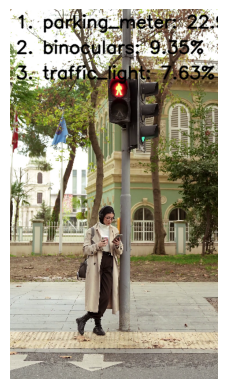

Video stopped manually.


In [ ]:
# Video capture
cam = cv2.VideoCapture('video/highlight.mp4')

try:
    frame_count = 0  # 🧮 Counter for skipping frames

    while True:  # while the video is open, do the following
        ret, frame = cam.read()
        if not ret:
            raise Exception("Could not capture the frame.")

        frame_count += 1

        # 🔁 Skip every 2nd frame for speed
        if frame_count % 2 != 0:
            continue

        # 🔻 Resize frame depending on orientation
        height, width = frame.shape[:2]
        if height > width:
            frame = cv2.resize(frame, (360, 640))  # portrait
        else:
            frame = cv2.resize(frame, (640, 360))  # landscape

        # 🧠 Classification preprocessing
        image = cv2.resize(frame, (224, 224))  # resize frames for the VGG19 model
        image = img_to_array(image)  # convert the image to a numpy array
        image = np.expand_dims(image, axis=0)  # add one dimension (1,224,224,3)
        image = preprocess_input(image)  # normalize as expected by VGG19

        preds = model.predict(image)

        # 🏷️ Get top-3 predictions
        labels = decode_predictions(preds, top=3)[0]
        
        # Adjust label area dynamically (so they always fit in the frame)
        start_y = int(0.05 * frame.shape[0])  # 5% from top
        line_height = int(0.07 * frame.shape[0])  # 7% of frame height per line

        for i, (imagenetID, label, prob) in enumerate(labels):
            label_text = f"{i+1}. {label}: {prob*100:.2f}%"
            y = start_y + i * line_height  # position each line lower

            # ✅ Ensure labels stay inside the frame vertically
            y = min(y, frame.shape[0] - 20)

            cv2.putText(frame, label_text, (10, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 0, 0), 2, cv2.LINE_AA)

        # Convert to RGB for displaying with matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Clear output and display
        display.clear_output(wait=True)
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.show()

except KeyboardInterrupt as ex:
    cam.release()
    print("Video stopped manually.")
except Exception as e:
    cam.release()
    print(f"Error while processing the video: {e}")


# **2. 🎯 Object Detection with YOLOv8**

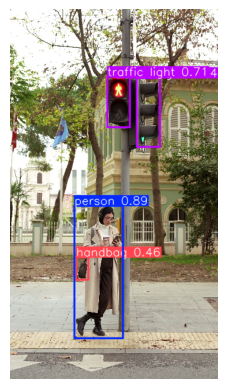

Video stopped manually.


In [ ]:
##Load pretrained YOLOv8n model
model = YOLO('yolov8n.pt')  # fastest and lightest yolo8 version
## Load the video
cam = cv2.VideoCapture('video/highlight.mp4')

try:
    frame_count = 0  ##frame counter

    while True:
        ret, frame = cam.read()
        if not ret:
            raise Exception("Could not capture the frame.")

        frame_count += 1

        ##Skip frames
        if frame_count % 2 != 0:  # skip odd frames
            continue

        ##Orientation and resizing for large videos
        height, width = frame.shape[:2]
        if height > width:
            frame = cv2.resize(frame, (360, 640))  # portrait
        else:
            frame = cv2.resize(frame, (640, 360))  # landscape

        ##YOLOv8 inference
        results = model(frame)

        #Draw detections
        annotated_frame = results[0].plot()

        ##Convert and display
        frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
        display.clear_output(wait=True)
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.show()

except KeyboardInterrupt:
    print("Video stopped manually.")
except Exception as e:
    print(f"Error while processing the video: {e}")
finally:
    cam.release()